In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### 연습문제 3.2

In [2]:
def clgs(A):
    m,n = np.shape(A)
    V=A
    Q=np.eye(m,n)
    R=np.zeros((n,n))
    for j in range(n):
        for i in range(j-1):
            R[i,j]=np.matmul(np.transpose(Q[:,i]),A[:,j])
            V[:,j]-=(R[i,j]*Q[:,i])
        R[j,j]=np.linalg.norm(V[:,j])
        Q[:,j]=V[:,j]/R[j,j]
    return (Q,R)

def mgs(A):
    m,n=np.shape(A)
    Q=A
    R=np.zeros((n,n))
    for i in range(n-1):
        R[i,i]=np.linalg.norm(Q[:,i])
        Q[:,i]/=R[i,i]
        R[i,i+1:n]=np.matmul(np.transpose(Q[:,i]), Q[:,i+1:n])
        Q[:,i+1:n]-=np.matmul(Q[:,i][:,np.newaxis],R[i,i+1:n][np.newaxis,:])
    R[n-1,n-1]=np.linalg.norm(Q[:,n-1])
    Q[:,n-1]/=R[n-1,n-1]
    return (Q, R)
        

def qrhouse(A):
    m,n = np.shape(A)
    R=np.copy(A)
    V=np.zeros((m,n))
    for k in range(min(m-1,n)):
        x=R[k:m,k]
        v=x+np.sign(x[0])*np.linalg.norm(x)*np.eye(len(x),1)[:,0]
        V[k:m,k]=v
        R[k:m,k:n]-=(np.matmul( (2*v)[:,np.newaxis],np.matmul(v[:,np.newaxis].T,R[k:m,k:n])) / np.dot(v.T,v) )
    R=np.triu(R[:n,:n])
    return (V, R)

def formQ(V):
    m,n=np.shape(V)
    Q=np.eye(m)
    for j in range(min(m-1,n)-1,-1,-1):
        v=V[:,j]
        Q-=(2*v)*(np.transpose(v)*Q)/(np.transpose(v)*v)
    return Q

In [3]:
U,X = np.linalg.qr(np.random.randn(80,80))
V,X = np.linalg.qr(np.random.randn(80,80))
v=np.array([2^(-J)for J in range(1,81)])
S=np.diag(v)
A=np.matmul(np.matmul(U,S),V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

In [4]:
A=np.array([[.70000, .70711], [.70001, .70711]])
Qm,Rm=mgs(A);
V,R = qrhouse(A)
Q=formQ(V)
print(np.linalg.norm(Q.T*Q-np.eye(2)))
print(np.linalg.norm(Qm.T*Qm-np.eye(2)))

0.0
1.0000142856352594


### 연습문제 3.3

In [5]:
def givens(A):
    m,n = np.shape(A)
    Q = np.eye(m)
    R = np.copy(A)
    rowcol=[(j-1,i)  for i in range(n) for j in range(m,i+1,-1)]
    for (i, j) in rowcol:
        if R[i, j]:
            a,b=R[j, j], R[i, j]
            r=math.hypot(a,b); c=a/r; s=-b/r
            G=np.eye(m)
            G[i,i]=c; G[j,j]=c; G[i,j]=s; G[j,i]=-s
            R=np.matmul(G,R)
            Q=np.matmul(Q,G.T)
    return (Q, np.triu(R))

In [6]:
A=np.array([[1,-2,3],[4,5,6],[7,8,9]])
Q,R=givens(A)
print(Q)
print(R)

[[ 0.12309149 -0.98552185 -0.11659831]
 [ 0.49236596  0.16265895 -0.85505428]
 [ 0.86164044  0.04784087  0.50525935]]
[[ 8.1240384   9.10877033 11.07823419]
 [ 0.          3.16706537 -1.55004408]
 [ 0.          0.         -0.93278649]]


### 연습문제 4.3

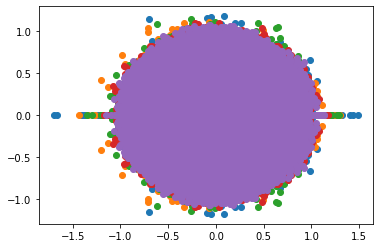

In [7]:
eigenvalues=[]
sr=[]; norm=[]; condition_number=[]
for m in [8,16,32,64,128]:
    X=[]; Y=[]
    for _ in range(100):
        A=np.random.randn(m,m)/math.sqrt(m)
        w,v=np.linalg.eig(A)
        norm.append(np.linalg.norm(A))
        spectral_radius=0
        for i in w:
            k=math.hypot(i.real,i.imag)
            if spectral_radius<k: spectral_radius=k
        sr.append(spectral_radius)
        X.extend(w.real)
        Y.extend(w.imag)
    plt.scatter(X,Y)

#### (b)

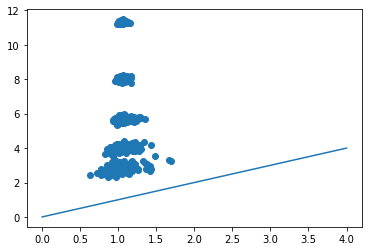

In [8]:
plt.scatter(sr,norm)
x=np.arange(0,5)
plt.plot(x, x)

spectral radius<=norm을 확인할 수 있음

#### (C)

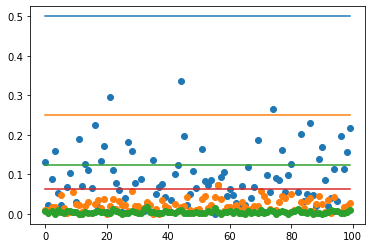

In [9]:
m_l=[8,32,128]
for m in m_l:
    condition_number=[]
    for _ in range(100):
        A=np.random.randn(m,m)/math.sqrt(m)    
        u,s,vh=np.linalg.svd(A)
        condition_number.append(min(s))
    x=np.arange(0,100)
    plt.scatter(x, condition_number)
for i in range(1,5):
    t=math.pow(2,-i)
    plt.plot(x,x-x+t)

m이 커질수록 condition number 분포가 0에 가까워진다

#### (d)

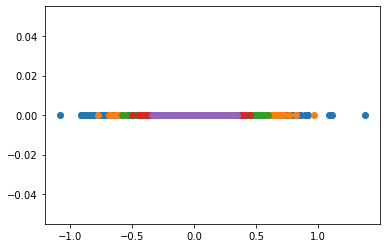

In [10]:
eigenvalues=[]
sr=[]; norm=[]; condition_number=[]
for m in [8,16,32,64,128]:
    X=[]; Y=[]
    for _ in range(100):
        A=np.random.randn(m,m)/math.sqrt(m)
        A=np.triu(A)
        w,v=np.linalg.eig(A)
        norm.append(np.linalg.norm(A))
        spectral_radius=0
        for i in w:
            k=math.hypot(i.real,i.imag)
            if spectral_radius<k: spectral_radius=k
        sr.append(spectral_radius)
        X.extend(w.real)
        Y.extend(w.imag)
    plt.scatter(X,Y)

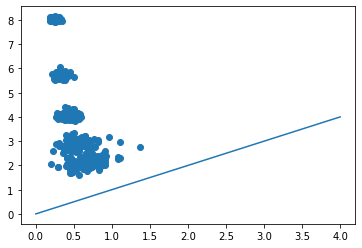

In [11]:
plt.scatter(sr,norm)
x=np.arange(0,5)
plt.plot(x, x)

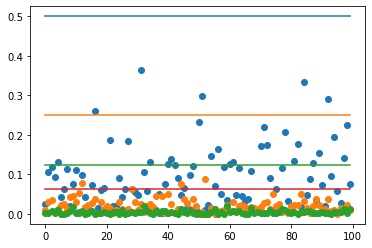

In [12]:
m_l=[8,32,128]
for m in m_l:
    condition_number=[]
    for _ in range(100):
        A=np.random.randn(m,m)/math.sqrt(m)    
        u,s,vh=np.linalg.svd(A)
        condition_number.append(min(s))
    x=np.arange(0,100)
    plt.scatter(x, condition_number)
for i in range(1,5):
    t=math.pow(2,-i)
    plt.plot(x,x-x+t)

A를 상삼각행렬로 테스트 -> (b),(c)에 대한 답은 같고, (a)의 경향은 허수부가 사라진다는 점 말고는 특별한 관찰점 없음

### 연습문제 4.6

In [13]:
t=np.linspace(0,1,50)
A=np.vander(t, 12, increasing=True)
b=np.cos(4*t)

#### (a)

In [19]:
x=np.linalg.solve(np.matmul(A.T,A),np.matmul(A.T,b))
print(x)

[-1.28587418e+00 -4.85638993e+00  1.34190071e+00  1.08473479e+00
 -1.33018931e-01 -6.11450648e-02  4.84711271e-03  1.55860855e-03
 -9.11877145e-05 -2.24958867e-05  1.03978941e-06  2.07347607e-07]


#### (b)

In [20]:
Q,R=mgs(A)
np.matmul(np.transpose(Q),b)
x=np.matmul(np.linalg.inv(R),np.matmul(np.transpose(Q),b))
print(x)

[-1.28587418e+00 -4.85638993e+00  1.34190071e+00  1.08473479e+00
 -1.33018931e-01 -6.11450648e-02  4.84711271e-03  1.55860855e-03
 -9.11877145e-05 -2.24958867e-05  1.03978941e-06  2.07347607e-07]


#### (c)

In [ ]:
V,R=qrhouse(A)
Q=formQ(V)
x=np.matmul(np.linalg.inv(R),np.matmul(np.transpose(Q),b))
print(x)

#### (d)

In [17]:
Q,R=np.linalg.qr(A)
x=np.matmul(np.linalg.inv(R),np.matmul(np.transpose(Q),b))
print(x)

[-1.28587418e+00 -4.85638993e+00  1.34190071e+00  1.08473479e+00
 -1.33018931e-01 -6.11450648e-02  4.84711271e-03  1.55860855e-03
 -9.11877145e-05 -2.24958867e-05  1.03978941e-06  2.07347606e-07]


#### (f)

In [18]:
u,s,vh=np.linalg.svd(A)

c = np.dot(u.T,b)
w = np.dot(np.diag(1/s),c[0:12])
x = np.dot(vh.conj().T,w)
print(x)

[-1.28587418e+00 -4.85638993e+00  1.34190071e+00  1.08473479e+00
 -1.33018931e-01 -6.11450648e-02  4.84711271e-03  1.55860855e-03
 -9.11877145e-05 -2.24958867e-05  1.03978941e-06  2.07347605e-07]


#### (g)

a~f에서 거의 동일하게 결과가 나왔음.